In [1]:
#In this assignment 4 I'm going to analyse the women 100 meters world record  from 1975

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Lets enter our data from wikipedia for the women 100m from 1975:
years = [1976, 1976, 1977, 1982, 1983, 1983, 1984, 1988]
times = [11.04, 11.01, 10.88, 10.88, 10.81, 10.79, 10.76, 10.49]
table = pd.DataFrame({"Year": years, "Time": times}) 
table 

,Year,Time
0,1976,11.04
1,1976,11.01
2,1977,10.88
3,1982,10.88
4,1983,10.81
5,1983,10.79
6,1984,10.76
7,1988,10.49


In [4]:
# Lets find the equation of our regression model

list_year = table[['Year']]  
list_time = table['Time']     
model = LinearRegression()
model.fit(list_year, list_time)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope (coefficient): {slope}")
print(f"Intercept: {intercept}")


Slope (coefficient): -0.03621825023518342
Intercept: 82.58538099717775


In [5]:
# Now using the equation of the regression model we found, lets predict the time for the year 2023-2030:

prediction_year = [[2023] , [2024] , [2025] , [2026] , [2027] , [2028] , [2029] , [2030]]
year_data = pd.DataFrame(prediction_year, columns=["Year"])
years_trend = np.array(range(1975, 2031)).reshape(-1, 1)
times_pred = model.predict(year_data)
pd.DataFrame({"Year": prediction_year, "Time": times_pred}) 

,Year,Time
0,[2023],9.315861
1,[2024],9.279643
2,[2025],9.243424
3,[2026],9.207206
4,[2027],9.170988
5,[2028],9.134770
6,[2029],9.098551
7,[2030],9.062333


In [7]:
# Now lets insert all the years from 1975 to 2030 and then find the predicted WR times for respectif year:
all_years = pd.DataFrame(range(1975, 2031), columns=["Year"])
all_WR_times = model.predict(all_years)
all_WR_times 

array([11.05433678, 11.01811853, 10.98190028, 10.94568203, 10.90946378,
       10.87324553, 10.83702728, 10.80080903, 10.76459078, 10.72837253,
       10.69215428, 10.65593603, 10.61971778, 10.58349953, 10.54728128,
       10.51106303, 10.47484478, 10.43862653, 10.40240828, 10.36619003,
       10.32997178, 10.29375353, 10.25753528, 10.22131703, 10.18509878,
       10.14888053, 10.11266228, 10.07644403, 10.04022578, 10.00400753,
        9.96778928,  9.93157103,  9.89535278,  9.85913452,  9.82291627,
        9.78669802,  9.75047977,  9.71426152,  9.67804327,  9.64182502,
        9.60560677,  9.56938852,  9.53317027,  9.49695202,  9.46073377,
        9.42451552,  9.38829727,  9.35207902,  9.31586077,  9.27964252,
        9.24342427,  9.20720602,  9.17098777,  9.13476952,  9.09855127,
        9.06233302])

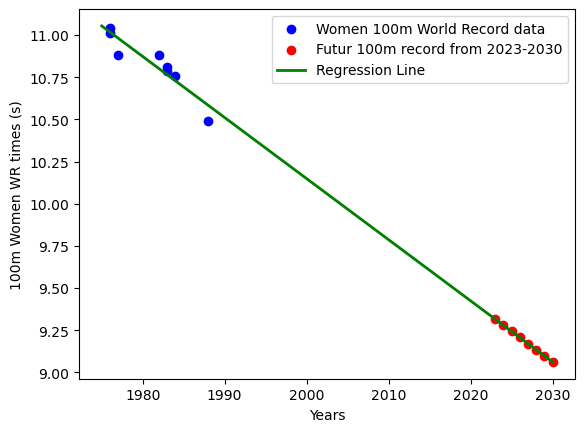

In [9]:
#Now lets plot our WR since 1975 with the projected time from 2023-2030:
plt.scatter(years,times ,label="Women 100m World Record data",color="blue")
plt.scatter(year_data,times_pred, label="Futur 100m record from 2023-2030",color="red")
plt.plot(all_years, all_WR_times, color='green', linewidth=2, label="Regression Line")
plt.legend()
plt.xlabel("Years")
plt.ylabel("100m Women WR times (s)")
plt.show()

In [10]:
# Lets find the r^2 of our regression model:
# We need to convert in list our data we enter at the beggining:
r_square = model.score(list_year,list_time)
r_square

0.8546228450935146